DATA SCIENCE

T094 : Shubhangi Mane

PRACTICAL NO : 8

AIM :K-Means Clustering
 Apply the K-Means algorithm to group similar data points into clusters.
 Determine the optimal number of clusters using elbow method or silhouette
analysis.
 Visualize the clustering results and analyze the cluster characteristics.

Import dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')


Load dataset

In [ ]:
# Load Mall Customers dataset
df = pd.read_csv('Mall_Customers.csv')

# Show first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Select Features for Clustering

In [ ]:
# We will use 'Annual Income' and 'Spending Score' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Optional: check shape
print("Shape of data:", X.shape)


Shape of data: (200, 2)


Standardize Features

In [ ]:
# Standardize features to scale data for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check first 5 rows
X_scaled[:5]


array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

Elbow Method to Find Optimal K

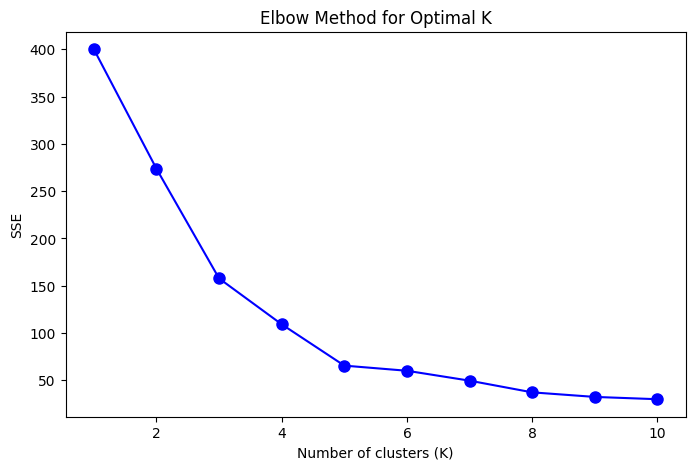

In [ ]:
# Elbow Method: Plot SSE vs K
sse = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # SSE

# Plot
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()


Train K-Means with Optimal K

In [ ]:
# Example: choose K=5 based on elbow method
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit and predict cluster labels
labels = kmeans.fit_predict(X_scaled)

# Centroids
centroids = kmeans.cluster_centers_
print("Centroids (scaled):\n", centroids)


Centroids (scaled):
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


SSE (Sum of Squared Errors)

In [ ]:
# SSE for the chosen K
sse_final = kmeans.inertia_
print("Final SSE:", sse_final)


Final SSE: 65.56840815571681


Dunn Index Calculation

In [ ]:
# Dunn Index function
def dunn_index(X, labels):
    unique_cluster_ids = np.unique(labels)
    delta = np.inf
    for i in unique_cluster_ids:
        for j in unique_cluster_ids:
            if i != j:
                dist = np.linalg.norm(X[labels == i][:, None] - X[labels == j], axis=2)
                delta = min(delta, dist.min())
    big_delta = 0
    for k in unique_cluster_ids:
        intra = cdist(X[labels == k], X[labels == k])
        np.fill_diagonal(intra, 0)
        big_delta = max(big_delta, intra.max())
    return delta / big_delta

# Calculate Dunn Index
d_index = dunn_index(X_scaled, labels)
print("Dunn Index:", d_index)


Dunn Index: 0.05940477803838099


Dunn Index vs K Plot

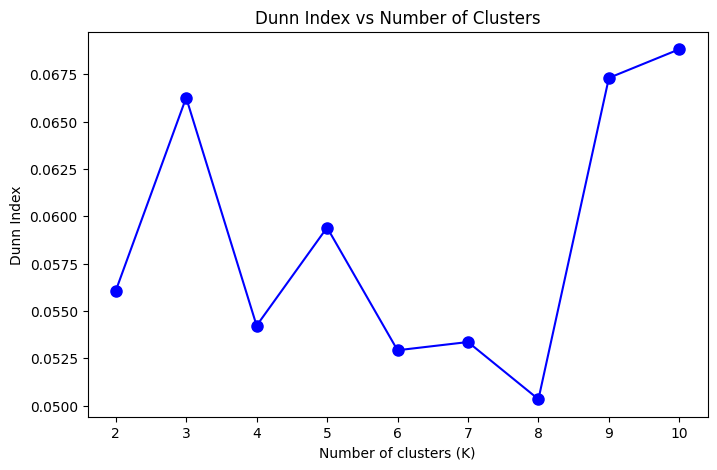

In [13]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Plot Dunn Index vs K
plt.figure(figsize=(8,5))
plt.plot(K_range, dunn_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index vs Number of Clusters')
plt.show()


Plot Clusters with Centroids

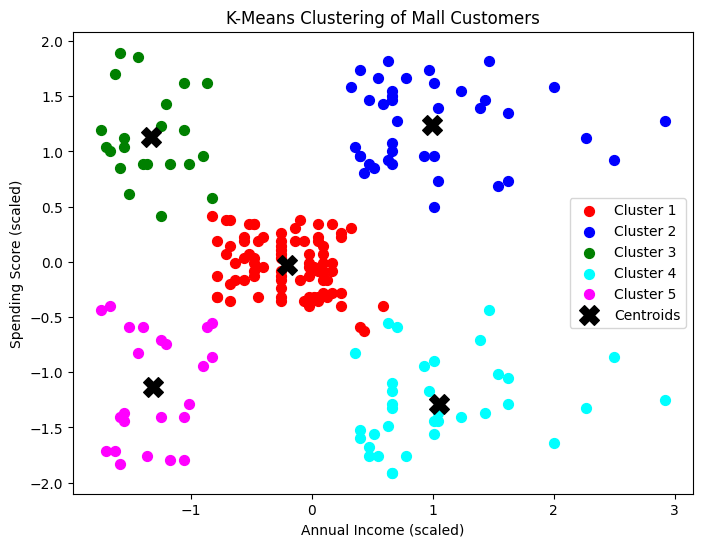

In [ ]:
# Plot clusters
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'orange']

for i in range(k):
    plt.scatter(X_scaled[labels == i, 0], X_scaled[labels == i, 1],
                s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()


Distance Between Points and Centroids (Euclidean)

In [ ]:
# Calculate Euclidean distance from each point to all centroids
distances = cdist(X_scaled, centroids, metric='euclidean')

# Show first 5 distances
print("Distances between points and centroids:\n", distances[:5])


Distances between points and centroids:
 [[1.59136934 3.20302576 1.61959155 2.92033087 0.8241417 ]
 [1.96453204 2.73093348 0.41435257 3.73598158 2.37223989]
 [2.25920692 3.99794559 2.87218971 2.78940569 0.69990996]
 [1.84064438 2.69976324 0.38245529 3.60549219 2.21262088]
 [1.50773152 3.11766122 1.56404344 2.8592051  0.82169642]]


Explanation of Expectation-Maximization

In [11]:
# 🔹 Expectation-Maximization steps:
# E-Step: Assign each data point to the nearest centroid
# M-Step: Recompute centroids as the mean of assigned points
# K-Means repeats these steps until SSE converges (no significant change)
print("E-Step and M-Step are automatically done in KMeans.fit() method in sklearn.")


E-Step and M-Step are automatically done in KMeans.fit() method in sklearn.
